### 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\assignments\\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

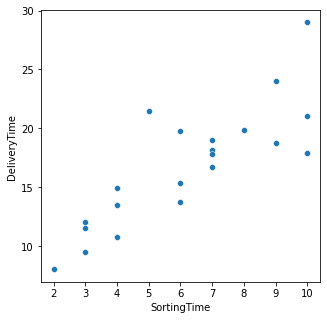

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='SortingTime',y='DeliveryTime',data=data,palette='Set1')

## Correlation

In [5]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

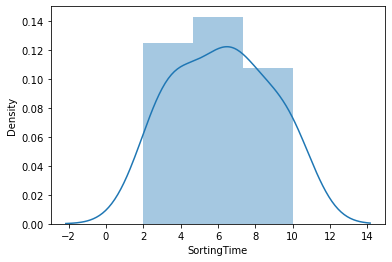

In [6]:
import seaborn as sns
sns.distplot(data['SortingTime'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

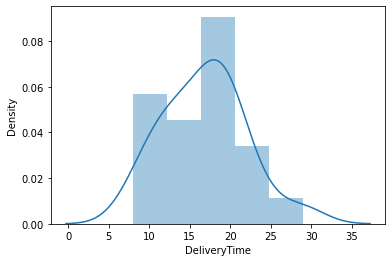

In [7]:
sns.distplot(data['DeliveryTime'])

## Fitting Linear Regression Model

In [8]:
import statsmodels.formula.api as smf

In [9]:
#ols=ordinary least squares
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()

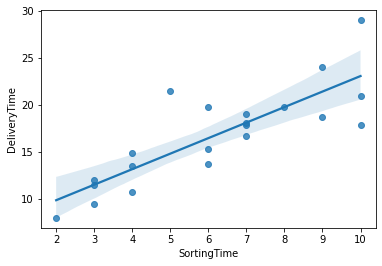

In [10]:
# to see best fitted line
sns.regplot(x="SortingTime",y="DeliveryTime",data=data);

In [11]:
# coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [12]:
# model prediction
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [13]:
model.rsquared

0.6822714748417231

In [14]:
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [15]:
data['Predicted']=model.fittedvalues

In [16]:
data['Error']=model.resid

In [17]:
data

,DeliveryTime,SortingTime,Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [18]:
data['Error_sq']=(data['Error']**2)
data['Error_sq']

0      4.297051
1      0.103161
2     10.713489
3      6.636224
4     35.130124
5      1.269798
6      0.764098
7      4.120062
8     26.759235
9      7.149811
10     0.003037
11     5.899135
12     2.090549
13     0.000888
14     0.250206
15     2.894035
16     7.435729
17     0.000252
18     3.537310
19     0.087541
20    44.517806
Name: Error_sq, dtype: float64

In [19]:
Mean_Squared_Error=data['Error_sq'].mean()
Mean_Squared_Error

7.793311548584063

since p-value is less than 0.05 the model is accepted

## 2) Salary_hike -> Build a prediction model for Salary_hike

In [20]:
import pandas as pd
salary=pd.read_csv("C:\\Users\\DELL\\Desktop\\assignments\\Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [21]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

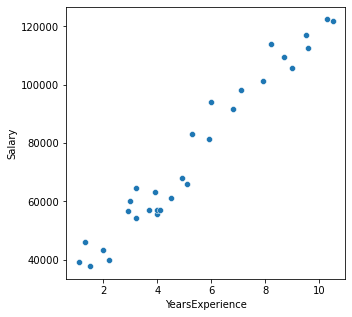

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='YearsExperience',y='Salary',data=salary,palette='Set1')

In [23]:
# correlation
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

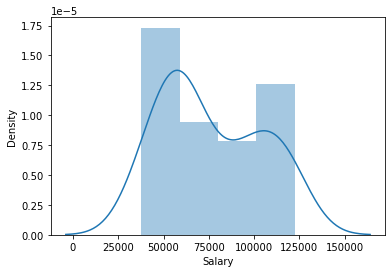

In [25]:
import seaborn as sns
sns.distplot(salary['Salary'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

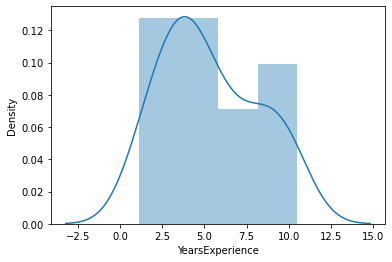

In [26]:
sns.distplot(salary['YearsExperience'])

## Fitting a Linear Regression Model

In [27]:
import statsmodels.formula.api as smf

In [28]:
#ols=ordinary least squares
model=smf.ols("Salary~YearsExperience",data=salary).fit()

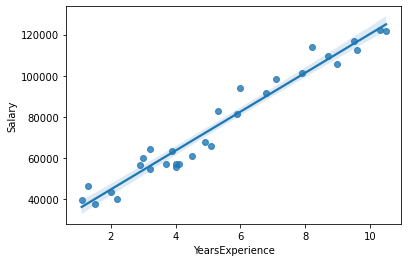

In [29]:
# best fit line
sns.regplot(x="YearsExperience",y="Salary",data=salary);

In [30]:
#coeeficient
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
#to see the model prediction
model.fittedvalues


0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [38]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [39]:
model.rsquared

0.9569566641435086

In [40]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [41]:
salary['Predicted']=model.fittedvalues

In [42]:
salary['error']=model.resid

In [43]:
salary

,YearsExperience,Salary,Predicted,error
0,1.1,39343,36187.158752,3155.841248
1,1.3,46205,38077.151217,8127.848783
2,1.5,37731,39967.143681,-2236.143681
3,2.0,43525,44692.124842,-1167.124842
4,2.2,39891,46582.117306,-6691.117306
5,2.9,56642,53197.090931,3444.909069
6,3.0,60150,54142.087163,6007.912837
7,3.2,54445,56032.079627,-1587.079627
8,3.2,64445,56032.079627,8412.920373
9,3.7,57189,60757.060788,-3568.060788


In [45]:
salary['Error_sq']=(salary['error']**2)
salary['Error_sq']

0     9.959334e+06
1     6.606193e+07
2     5.000339e+06
3     1.362180e+06
4     4.477105e+07
5     1.186740e+07
6     3.609502e+07
7     2.518822e+06
8     7.077723e+07
9     1.273106e+07
10    3.259802e+05
11    6.080958e+07
12    4.402388e+07
13    5.559262e+07
14    5.192688e+07
15    1.729741e+07
16    6.332989e+07
17    5.199851e+07
18    3.384787e+04
19    1.310573e+08
20    2.842785e+06
21    2.900972e+07
22    7.311917e+05
23    1.108832e+08
24    2.028139e+06
25    2.766614e+07
26    1.966046e+06
27    1.502988e+07
28    5.414195e+05
29    9.889796e+06
Name: Error_sq, dtype: float64

In [46]:
Mean_Squared_Error=salary['Error_sq'].mean()
Mean_Squared_Error

31270951.722280964

since p-value is less than 0.05 the model is accepted